# Importing the required packages: GeoPandas, Rasterio

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import rasterio
from rasterio.plot import show
import rasterstats
import numpy as np

In [37]:
# def read_shapefile(sf):
#     """
#     Read a shapefile into a Pandas dataframe with a 'coords' 
#     column holding the geometry information. This uses the pyshp
#     package
#     """
#     fields = [x[0] for x in sf.fields][1:]
#     records = sf.records()
#     shps = [s.points for s in sf.shapes()]
#     df = pd.DataFrame(columns=fields, data=records)
#     df = df.assign(coords=shps)
#     return df

# Shapefile
The shapefile is in fact a grouping of several files formatted to represent different aspects of geodata:

.shp — shape format; the feature geometry itself.

.shx — shape index format; a positional index of the feature geometry to allow seeking forwards and backwards quickly.

.dbf — attribute format; columnar attributes for each shape, in dBase IV format.

### Reading the data

In [38]:
# importing the data
shapefile = gpd.read_file("/Users/sashanksilwal/Desktop/SLResearch/Example_data/Conwy.shp")
shapefile.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [39]:
# This means that there exist 1629 shapes on our shape files
len(shapefile)

1629

In [40]:
# %pip install rasterio
%cd Example_data/
%ls

[Errno 2] No such file or directory: 'Example_data/'
/Users/sashanksilwal/Desktop/SLResearch/Example_data
Conwy.dbf        Conwy.shp        ConwyLU.tif      ConwyStatus.tif
Conwy.prj        Conwy.shx        ConwySlope.tif   Icon?


In [41]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [42]:
shapefile.head()

,LU,Status,Slope,geometry
0,1.0,4.0,8.0,"POLYGON ((281250.000 382000.000, 281450.000 38..."
1,2.0,4.0,10.0,"POLYGON ((281450.000 382000.000, 281650.000 38..."
2,2.0,NaN,13.0,"POLYGON ((281670.000 381800.000, 281850.000 38..."
3,1.0,4.0,8.0,"POLYGON ((281230.000 381800.000, 281250.000 38..."
4,1.0,NaN,6.0,"POLYGON ((280850.000 381800.000, 281230.000 38..."


In [43]:
shapefile.columns

Index(['LU', 'Status', 'Slope', 'geometry'], dtype='object')

In [44]:
# df = read_shapefile(shapefile)

### Plotting the graphs

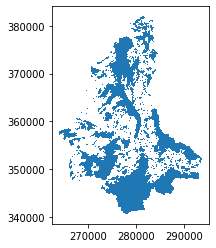

In [45]:
# plotting the data 

shapefile.plot()

In [46]:
len(shapefile)

1629

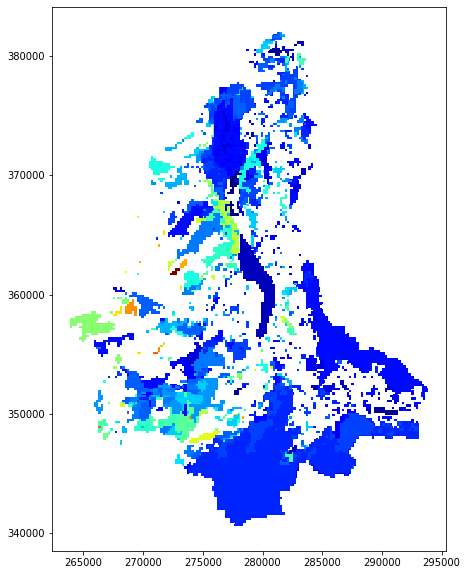

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = 'Slope', cmap='jet')

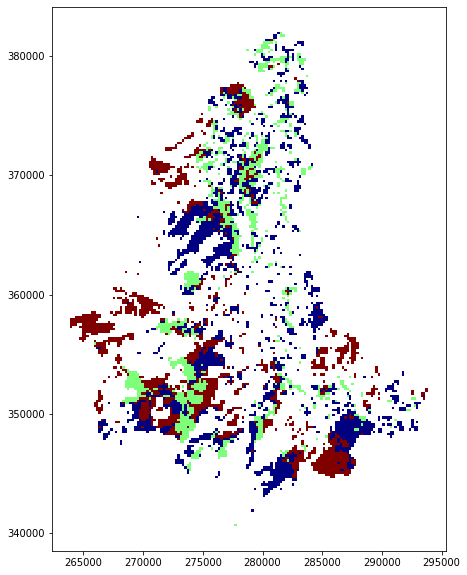

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = 'LU', cmap='jet')

Text(0.5, 1, 'The graph: ')

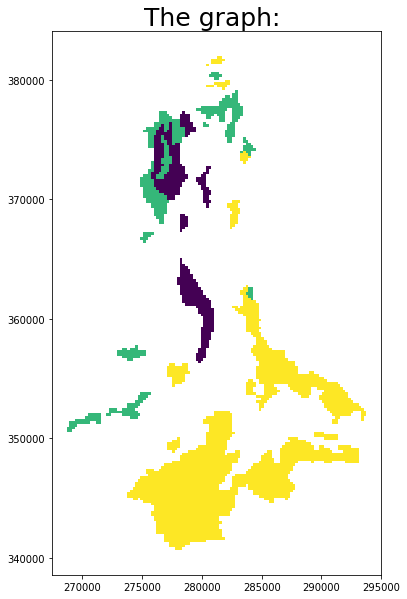

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = 'Status')
# ax.axis('off')
ax.set_title("The graph: ", fontdict = {'fontsize':'25', 'fontweight':'5'})

In [50]:
AOI = gpd.read_file("/Users/sashanksilwal/Desktop/SLResearch/Example_data/Conwy.shp")

# Geotiff files

In [51]:
fp = r'/Users/sashanksilwal/Desktop/SLResearch/Example_data/ConwyLU.tif'
img = rasterio.open(fp)
fp2 = r'/Users/sashanksilwal/Desktop/SLResearch/Example_data/ConwyStatus.tif'
img2 = rasterio.open(fp2)
fp3 = r'/Users/sashanksilwal/Desktop/SLResearch/Example_data/ConwySlope.tif'
img3 = rasterio.open(fp3)

In [52]:
print(img.mode)
print(img.count)
print("Height:", img.height, "Width:", img.width)

r
1
Height: 207 Width: 150


In [53]:
# covers the world from 263150 - 294950 left to right 
# covers the world from 339700 - 386500 bottom to top

img.bounds

BoundingBox(left=263850.00000000093, bottom=340600.0, right=293850.00000000093, top=382000.0)

In [54]:
# the images are relative to the origin of the dataset's coordinate reference system (CRS)

img.crs

CRS.from_wkt('PROJCS["OSGB_1936_Transverse_Mercator",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

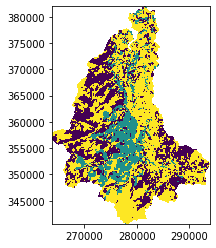

In [55]:
#  LU

show(img)

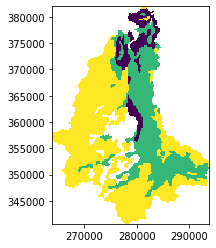

In [56]:
# Status
show(img2)

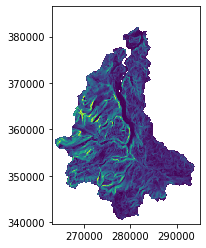

In [57]:
# Slope

show(img3)

In [58]:
img

<open DatasetReader name='/Users/sashanksilwal/Desktop/SLResearch/Example_data/ConwyLU.tif' mode='r'>

In [59]:
img.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 0.0,
 'width': 150,
 'height': 207,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["OSGB_1936_Transverse_Mercator",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(200.0, 0.0, 263850.00000000093,
        0.0, -200.0, 382000.0)}

In [60]:
raster_array = img.read(1)
print(raster_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
raster_array.shape

(207, 150)

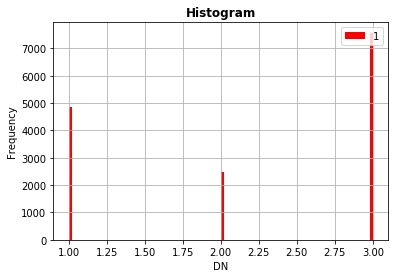

In [62]:
from rasterio.plot import show_hist
show_hist(img, bins=100, title="Histogram")

## Geotiff and Shapefile together

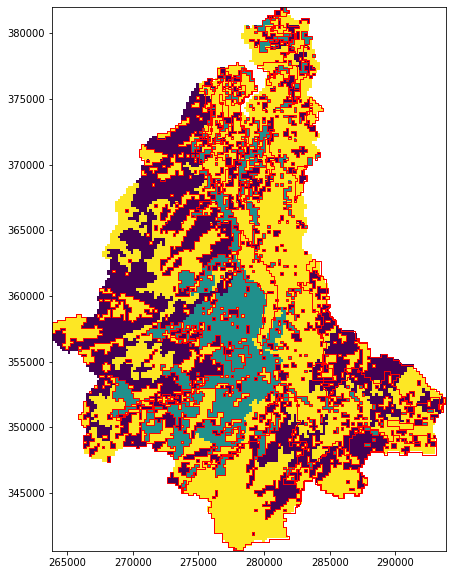

In [63]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
show(img, ax = ax)
shapefile.plot(ax = ax, facecolor = "None", edgecolor = "red")
plt.show()

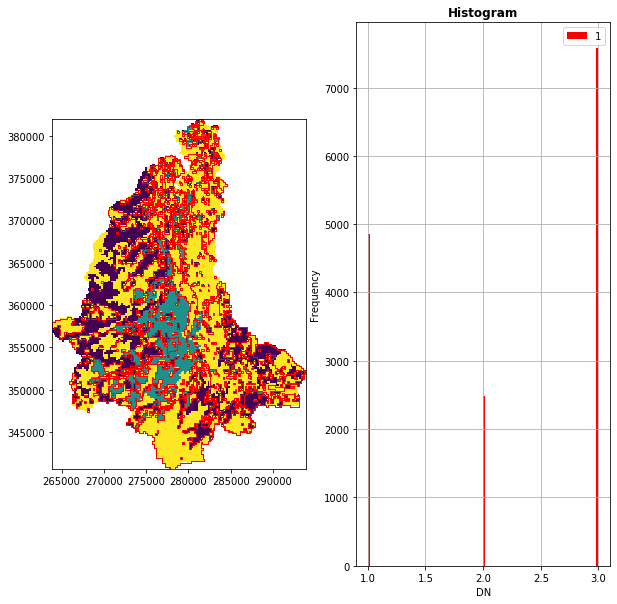

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,10))
show(img, ax = ax1)
shapefile.plot(ax = ax1, facecolor = "None", edgecolor = "red")
show_hist(img, bins=100, title="Histogram", ax=ax2)
plt.show()

In [65]:
affine = img.transform

In [66]:
average_ = rasterstats.zonal_stats(shapefile, raster_array,affine = affine, stats=['mean'])

/opt/anaconda3/lib/python3.7/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [67]:
len(average_)

1629

In [68]:
i = 0
avg = []

while i < len(average_):
    avg.append(average_[i]['mean'])
    i += 1

In [69]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tifffile as tf
# import geopandas as gpd
# from osgeo import gdal

# import rasterio
# import rasterio.features
# import rasterio.warp

In [70]:
b = [i for i in range(100) if i % 3 == 0 or i % 5 == 0]
a = sum(b)

In [71]:
a

2318

In [73]:
a = 1
b = 2
temp = 0

while (a+b < 40):
    c = a + b
    if (c % 2 == 0):
        temp += c
    a = b
    b = c
        
print(c)
        

34


In [74]:
print(a)

21
